In [1]:
from IPython.display import display
import pandas as pd

df = pd.read_csv('loan_data.csv')
display(df)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,74047.0,30000,30000,23.28%,60 months,other,12.10%,IL,MORTGAGE,7083.33,675-679,16,17969,1.0,10+ years
2196,63768.0,4200,4200,14.33%,60 months,car,14.16%,NJ,RENT,3850.00,700-704,4,5718,0.0,2 years
2197,94545.0,19800,19775,15.31%,60 months,debt_consolidation,15.03%,IL,MORTGAGE,6666.67,675-679,10,46879,3.0,6 years
2198,53635.0,18000,18000,20.99%,60 months,credit_card,11.63%,CA,RENT,9051.83,670-674,5,32394,2.0,4 years


In [2]:
import sweetviz

report = sweetviz.analyze(df)
report.show_html()

:FEATURES DONE:                    |█████████████████████| [100%]   00:01  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)
Creating Associations graph... DONE!
Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [3]:
#Convert FICO range to a number
import numpy as np

df.replace('.', np.nan, inplace=True)


pattern = r"(?P<lower>\d+)\-(?P<upper>\d+)"
repl = lambda m:  str((int(m.group('lower')) + int(m.group('upper')))/2)

df['FICO']                    =df['FICO.Range'].str.replace(pattern, repl, regex=True).astype(float)

def percentage_to_float(s):
    try:
        if s == '':
            return np.nan
        if '%' in s:
            return float(s.strip("%"))/100
        return float(s)
    except Exception as ex:
        return np.nan

#Convert percentage to a number
df['Modified.Interest.Rate']                 =df['Interest.Rate'].apply(percentage_to_float)
df['Modified.Debt.To.Income.Ratio']          =df['Debt.To.Income.Ratio'].apply(percentage_to_float)

display(df[['FICO.Range','FICO', 'Modified.Interest.Rate', 'Modified.Debt.To.Income.Ratio']])
display(df['Modified.Debt.To.Income.Ratio'])



,FICO.Range,FICO,Modified.Interest.Rate,Modified.Debt.To.Income.Ratio
0,720-724,722.0,0.1849,0.2756
1,710-714,712.0,0.1727,0.1339
2,690-694,692.0,0.1433,0.0350
3,710-714,712.0,0.1629,0.1962
4,730-734,732.0,0.1223,0.2379
...,...,...,...,...
2195,675-679,677.0,0.2328,0.1210
2196,700-704,702.0,0.1433,0.1416
2197,675-679,677.0,0.1531,0.1503
2198,670-674,672.0,0.2099,0.1163


0       0.2756
1       0.1339
2       0.0350
3       0.1962
4       0.2379
         ...  
2195    0.1210
2196    0.1416
2197    0.1503
2198    0.1163
2199    0.0383
Name: Modified.Debt.To.Income.Ratio, Length: 2200, dtype: float64

In [4]:
#Convert Employment Length to number
import numpy as np
pattern = r'(\d+) (years?)'
display(df['Employment.Length'].head(10) )
def decorate_employment_length(x):
    try:
        if x == '< 1 year':
            return 0.5
        if x == '10+ years':
            return 12.0
        return float(x.replace('years', '').replace('year', '').strip())
    except:
        return np.nan
df['Modified.Employment.Length'] = df['Employment.Length'].apply(decorate_employment_length)
df['Modified.Employment.Length'] = df['Modified.Employment.Length'].replace(np.nan, df['Modified.Employment.Length'].mean())

display(df['Modified.Employment.Length'])

0      5 years
1      4 years
2     < 1 year
3    10+ years
4    10+ years
5          NaN
6      2 years
7     < 1 year
8          NaN
9          NaN
Name: Employment.Length, dtype: object

0        5.0
1        4.0
2        0.5
3       12.0
4       12.0
        ... 
2195    12.0
2196     2.0
2197     6.0
2198     4.0
2199     2.0
Name: Modified.Employment.Length, Length: 2200, dtype: float64

In [5]:
#Overview the table
features = ['Amount.Requested', 
            'Amount.Funded.By.Investors', 
            'Loan.Length', 
            'Loan.Purpose', 
            'Modified.Debt.To.Income.Ratio', 
            'State', 'Home.Ownership', 
            'Monthly.Income', 
            'FICO', 
            'Open.CREDIT.Lines', 
            'Revolving.CREDIT.Balance', 
            'Inquiries.in.the.Last.6.Months', 
            'Modified.Employment.Length']
display(df[features], df['Modified.Interest.Rate'])

,Amount.Requested,Amount.Funded.By.Investors,Loan.Length,Loan.Purpose,Modified.Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Modified.Employment.Length
0,25000,25000,60 months,debt_consolidation,0.2756,VA,MORTGAGE,8606.56,722.0,11,15210,3.0,5.0
1,19750,19750,60 months,debt_consolidation,0.1339,NY,MORTGAGE,6737.50,712.0,14,19070,3.0,4.0
2,2100,2100,36 months,major_purchase,0.0350,LA,OWN,1000.00,692.0,13,893,1.0,0.5
3,28000,28000,36 months,credit_card,0.1962,NV,MORTGAGE,7083.33,712.0,12,38194,1.0,12.0
4,24250,17431.82,60 months,credit_card,0.2379,OH,MORTGAGE,5833.33,732.0,6,31061,2.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000,30000,60 months,other,0.1210,IL,MORTGAGE,7083.33,677.0,16,17969,1.0,12.0
2196,4200,4200,60 months,car,0.1416,NJ,RENT,3850.00,702.0,4,5718,0.0,2.0
2197,19800,19775,60 months,debt_consolidation,0.1503,IL,MORTGAGE,6666.67,677.0,10,46879,3.0,6.0
2198,18000,18000,60 months,credit_card,0.1163,CA,RENT,9051.83,672.0,5,32394,2.0,4.0


0       0.1849
1       0.1727
2       0.1433
3       0.1629
4       0.1223
         ...  
2195    0.2328
2196    0.1433
2197    0.1531
2198    0.2099
2199    0.1016
Name: Modified.Interest.Rate, Length: 2200, dtype: float64

In [6]:
#Devide the loan interest rates by standart deviation error
# print('mean = {0:.3f}, std = {1:.3f}'.format(df['Modified.Interest.Rate'].mean(), df['Modified.Interest.Rate'].std()))

# def label(x):
#     if x > df['Modified.Interest.Rate'].mean() + df['Modified.Interest.Rate'].std():
#         return 'Higher Interest Rate'
#     if x < df['Modified.Interest.Rate'].mean() - df['Modified.Interest.Rate'].std():
#         return 'Lower Interest Rate'
#     return 'Normal Interest Rate'

df['Label'] = pd.qcut(df['Modified.Interest.Rate'],3, ['Lower Interest Rate', 'Normal Interest Rate', 'Higher Interest Rate'])
display(df[['Modified.Interest.Rate', 'Label']])

df.dropna(inplace=True)


,Modified.Interest.Rate,Label
0,0.1849,Higher Interest Rate
1,0.1727,Higher Interest Rate
2,0.1433,Normal Interest Rate
3,0.1629,Higher Interest Rate
4,0.1223,Normal Interest Rate
...,...,...
2195,0.2328,Higher Interest Rate
2196,0.1433,Normal Interest Rate
2197,0.1531,Higher Interest Rate
2198,0.2099,Higher Interest Rate


In [7]:
# # Regenerate sweetviz
import sweetviz

featured_df = df[features+['Modified.Interest.Rate', 'Label']]
featured_df.to_csv('cleaned_loan_data.csv')

report = sweetviz.analyze(featured_df)
report.show_html('cleaned_loan_data.html')


:FEATURES DONE:                    |█████████████████████| [100%]   00:02  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)
Creating Associations graph... DONE!
Report cleaned_loan_data.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


In [8]:
import numpy as np
import pandas as pd
#Null Value Imputation

featured_df = pd.read_csv('cleaned_loan_data.csv')
featured_df.dropna(inplace=True)


In [9]:
from sklearn import preprocessing

cateogry_features = ['Loan.Length', 'Loan.Purpose', 'State', 'Home.Ownership']
numerical_features = ['Amount.Requested', 'Amount.Funded.By.Investors', 'Modified.Debt.To.Income.Ratio', 'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months']
features = numerical_features + cateogry_features

loan_length_encoder = preprocessing.LabelEncoder()
featured_df['Loan.Length'] = loan_length_encoder.fit_transform(featured_df['Loan.Length'])

loan_purpose_encoder = preprocessing.LabelEncoder()
featured_df['Loan.Purpose'] = loan_purpose_encoder.fit_transform(featured_df['Loan.Purpose'])

state_encoder = preprocessing.LabelEncoder()
featured_df['State'] = state_encoder.fit_transform(featured_df['State'])

home_ownership_encoder = preprocessing.LabelEncoder()
featured_df['Home.Ownership'] = home_ownership_encoder.fit_transform(featured_df['Home.Ownership'])

label_encoder = preprocessing.LabelEncoder()
featured_df['Label'] = label_encoder.fit_transform(featured_df['Label'])

X = featured_df[features]
Y = featured_df['Label']



In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(x_train, y_train)

Y_predicted = clf.predict(x_test)

print('Decision tree Accuracy score=>',accuracy_score(y_test, Y_predicted))

Decision tree Accuracy score=> 0.5083135391923991


In [11]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(clf, out_file='loan.dot', 
                feature_names = features,
                rounded = True, proportion = False, 
                class_names=list(label_encoder.classes_),
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'loan.dot', '-o', 'loan.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'loan.png')

In [12]:
#random forest
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

rfc = RandomForestClassifier(max_features='sqrt', n_estimators=300, n_jobs=-1, oob_score = True)
rfc.fit(x_train, y_train)
rfc_pred_train = rfc.predict(x_train)

print('random forest Training Accuracy score=>',accuracy_score(y_train, rfc_pred_train))

# Evaluating on Training set
y_predicted = rfc.predict(x_test)
print('random forest Test Accuracy score=>',accuracy_score(y_test, y_predicted))


random forest Training Accuracy score=> 1.0
random forest Test Accuracy score=> 0.4821852731591449


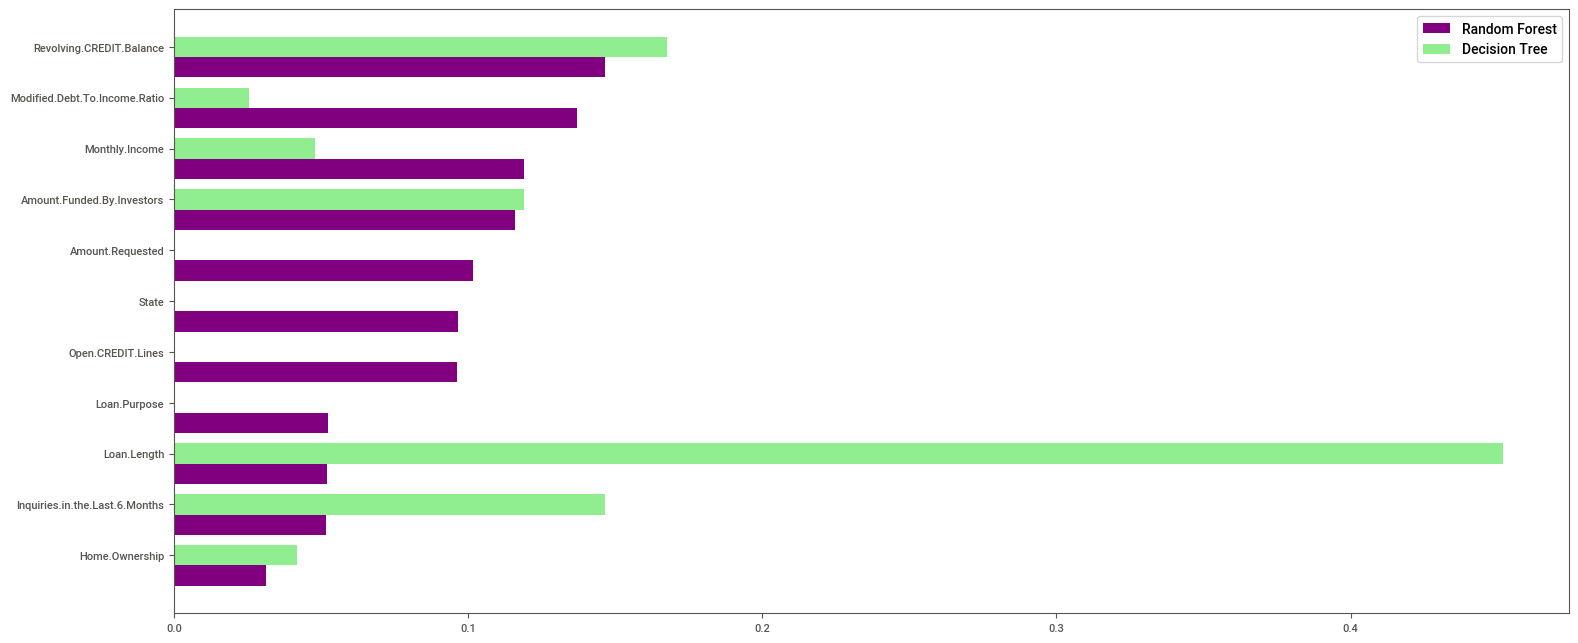

In [13]:
import matplotlib.pyplot as plt

feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dt' :clf.feature_importances_},
    index = features)

feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))

fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()